In [1]:
from jeffutils.utils import reimport
from pprint import pprint

from data_loader import *
reimport(["from data_loader import *"], globals())

date_time = dt.datetime.now().strftime(date_format)

2 models 	['dl_fold', 'dl_softfold'] on
1 datasets 	['digits'] at 241026@2245

{'datasets': {'cancer': {'data_ratios': [1],
                         'func': <function load_cancer at 0x0000017189DF3EC0>},
              'cifar10': {'data_ratios': [1],
                          'func': <function load_cifar10 at 0x0000017189DF3E20>},
              'digits': {'data_ratios': [1],
                         'func': <function load_digits_data at 0x0000017189DF3F60>},
              'fashionMNIST': {'data_ratios': [1],
                               'func': <function load_fashion at 0x0000017189E0C040>},
              'imagenet': {'data_ratios': [1],
                           'func': <function load_imagenet at 0x0000017189E0C0E0>}},
 'random_state': 42,
 'test_size': 0.2}
Testing dl_fold on digits
	X shape:  (1437, 64)
	y shape:  (1437,)


Training:   0%|          | 0/9000 [00:00<?, ?it/s]

epoch:200/200, batch: 45/45, loss:0.0010: 100%|██████████| 9000/9000 [01:19<00:00, 113.48it/s]


Testing dl_softfold on digits
	X shape:  (1437, 64)
	y shape:  (1437,)


epoch:200/200, batch: 45/45, loss:0.0009: 100%|██████████| 9000/9000 [01:38<00:00, 91.38it/s] 


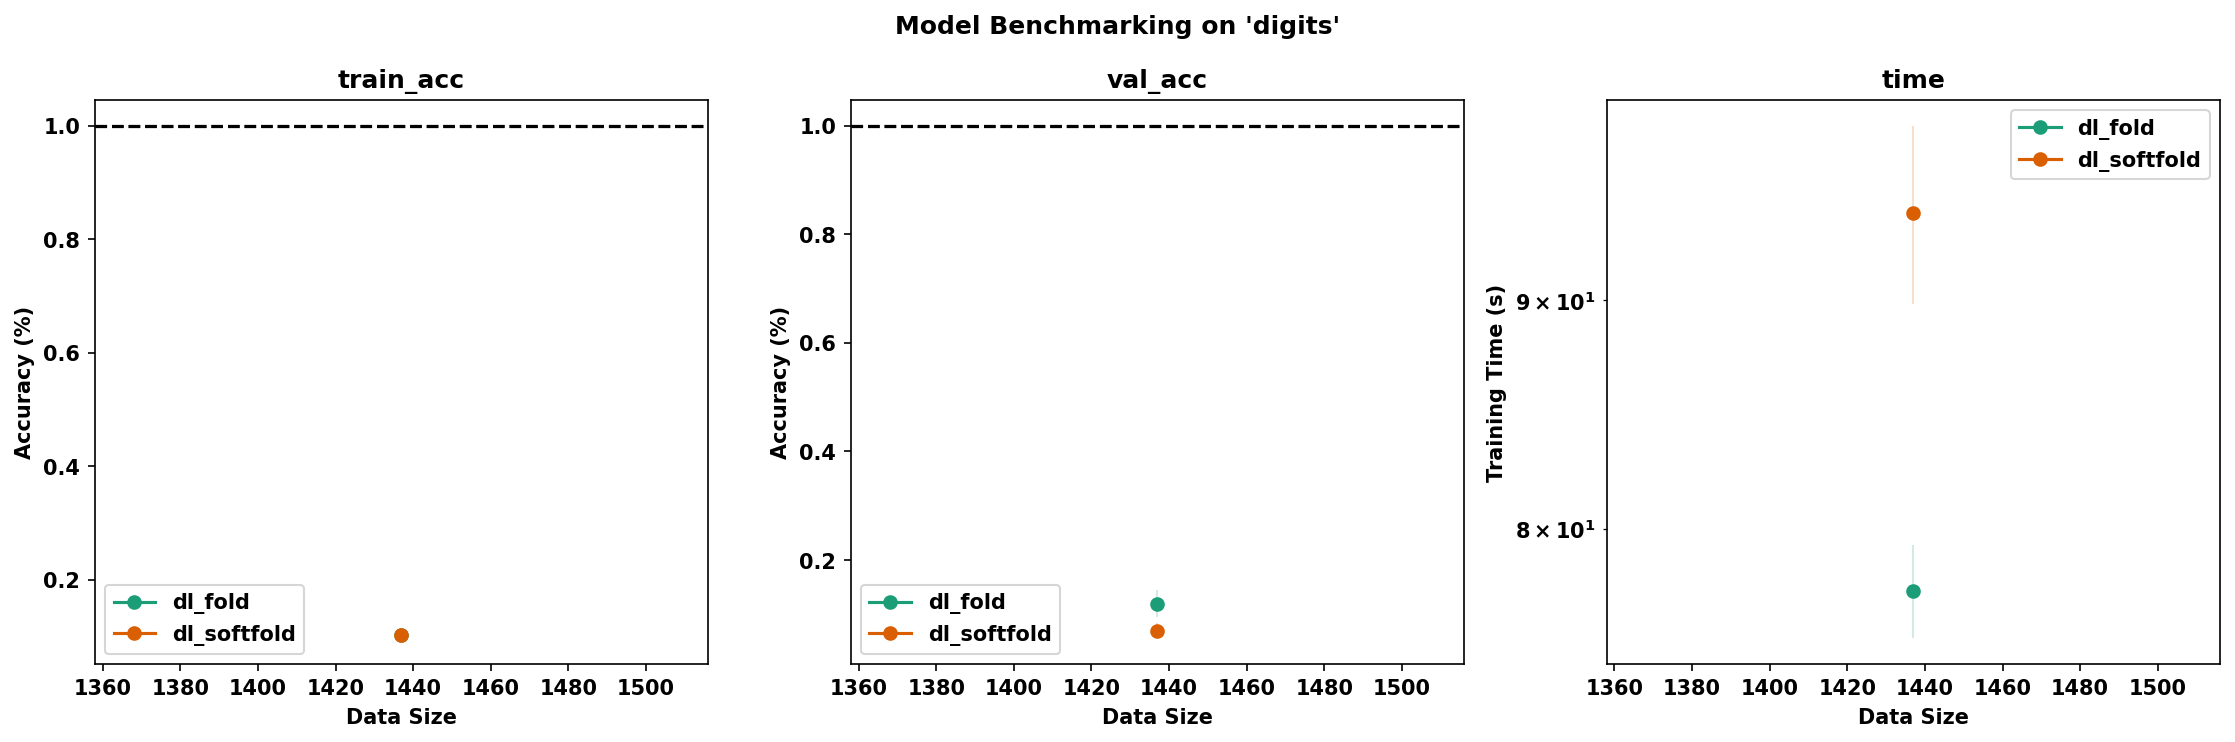

In [2]:
test_results = {}
verbose = 2
new_set = False
repeat = 2

if new_set:
    date_time = dt.datetime.now().strftime(date_format)

if verbose > 0:
    print(f"{len(benchmark_models)} models \t{benchmark_models} on")
    print(f"{len(benchmark_datasets)} datasets \t{benchmark_datasets} at {date_time}\n")
if verbose > 1:
    pprint(config)

for dataset_name in benchmark_datasets:
    test_results[dataset_name] = {}
    for model_name in benchmark_models:
        try:
            results, sizes = test_model(model_name, date_time, dataset_name, 
                                        return_sizes=True, repeat=repeat, verbose=verbose)
            test_results[dataset_name].update(results)
        except InvalidModelError as e:
            print(f"Error: {e}")
            print(f"Skipping {model_name} on {dataset_name}")
            continue
    constants = (sizes, date_time, dataset_name)
    plot_results(test_results[dataset_name], constants, 
                 save_fig=True, replace_fig=True, from_data=False)